In [1]:
# CO line conversions routines 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

from astropy.cosmology import Planck18 as Planck

In [3]:
#cosmo = FlatLambdaCDM(H0=67.4 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.315)


#cosmo = FlatLambdaCDM(H0=71 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.27)

#Bothwell
#cosmo = FlatLambdaCDM(H0=71 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.27)

Om = 1-0.687
cosmo = FlatLambdaCDM(H0=68 * u.km / u.s / u.Mpc, Tcmb0=2.7255 * u.K, Om0=Om)

In [4]:
# Table 4 from Bothwell

J = np.array([2,3,4,5,6,7])



r_J = np.array([0.84,0.52,0.41,0.32,0.21,0.18])
r_J_err = np.array([0.13,0.09,0.07,0.05,0.04,0.04])

invr_J = 1./r_J 
invr_J_err = 1/r_J * np.sqrt((r_J_err/r_J)**2)


In [5]:
invr_J 

array([1.19047619, 1.92307692, 2.43902439, 3.125     , 4.76190476,
       5.55555556])

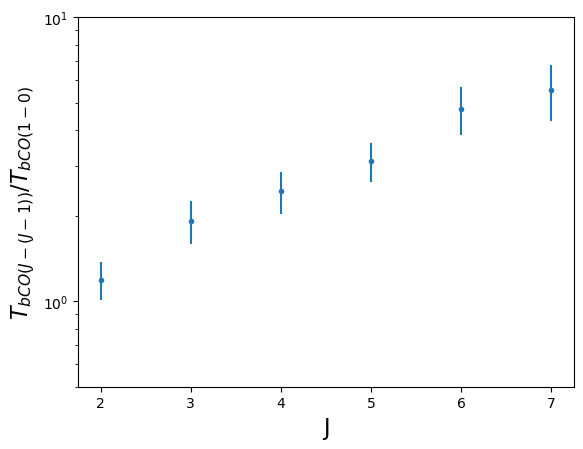

In [6]:
plt.errorbar(J,invr_J,yerr=invr_J_err,fmt=".")
#plt.errorbar(1,1,yerr=0,fmt=".")

plt.ylabel("$T_{b CO(J-(J-1))}$/$T_{b CO(1-0)}$",fontsize=16)
plt.xlabel("J",fontsize=16)

plt.ylim(0.5,10)
plt.yscale("log")

plt.savefig("CO_conversion.png",dpi=200)
plt.savefig("CO_conversion.pdf")

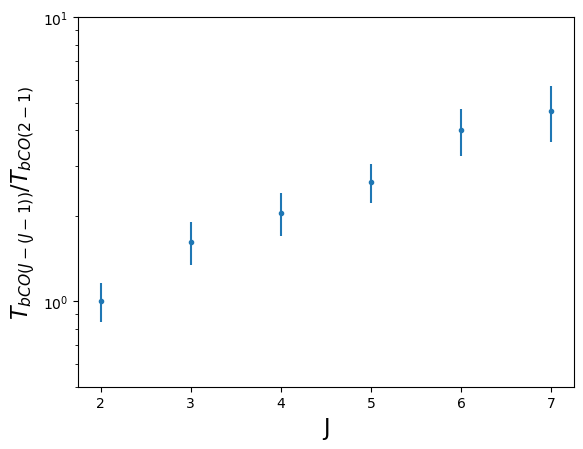

In [7]:
plt.errorbar(J,invr_J*0.84,yerr=invr_J_err*0.84,fmt=".")
#plt.errorbar(1,1,yerr=0,fmt=".")

plt.ylabel("$T_{b CO(J-(J-1))}$/$T_{b CO(2-1)}$",fontsize=16)
plt.xlabel("J",fontsize=16)

plt.ylim(0.5,10)
plt.yscale("log")


In [8]:
#Conversion from J-(J-1) to 1-0
def toC10(L,L_err,J):
    """
    Converts from luminosity J-(J-1) to 1-0 using
    Bothwell et al. 2013 Table 4 (MNRAS 429 3047)
    
    
    J: CO upper line transition [1,2,3,4,5,6,7] (int)
    L: CO line luminosity [K km s^-1 pc^2] (float)
    L_err: CO line flux uncertainty [K km s^-1 pc^2] (float)
    
    usage: for example to convert a luminosity of 
    10 pm 1 (K km s^-1 pc^2) from (3-2) to (1-0)
    we use toC10(3,10,1)
    
    The ratio of brightness temperature is the ratio
    of Luminosities according to Solomo 1997 eq 2
    """
    val = np.array([0.84,0.52,0.41,0.32,0.21,0.18])
    err = np.array([0.13,0.09,0.07,0.05,0.04,0.04])
    if J==1:
        return L,L_err
    L_c = (1./val[J-2])*L
    L_c_err = L_c*np.sqrt((L_err/L)**2+(err[J-2]/val[J-2])**2)
    return L_c,L_c_err


In [9]:
#nu of the CO line transitions
nu10 = 115.27120180
nu21 = 230.53800000
nu32 = 345.79598990
nu43 = 461.04076820
nu54 = 576.26793050
nu65 = 806.65180600
nu76 = 921.7997

nurest = np.array([nu10,nu21,nu32,nu43,nu54,nu65,nu76])

def LpCO(I,I_err,z,J):
    """
    Calculates the Apparent CO line Luminosity from the line intensity, 
    frequency and redshift assuming a Planck Cosmology framework
    
    I: CO(J-(J-1)) velocity integrated flux [Jy km/s] (float)
    I_err: CO(J-(J-1)) velocity integrated flux uncertainty [Jy km/s] (float)
    z: redshift (float)
    J: Upper J transition (int)
    
    return: Apparent Luminosity of the CO emission line [K km/s pc^2] (float,float)
    """
    
    nu_rest = nurest[J-1]
    nu = nu_rest/(1.+z)
    #DL = Planck.luminosity_distance(z).value
    DL = cosmo.luminosity_distance(z).value
    LCO = 3.25e7*I*(nu**(-2))*(DL**2)*((1+z)**(-3))
    LCO_err = 3.25e7*I_err*(nu**(-2))*(DL**2)*((1+z)**(-3))
    return np.array([LCO,LCO_err])




In [10]:
#magnification from V and L'CO(1-0)

def muCO(V,Ve,LpCO10,LpCO10e):
    DV = ufloat(V,Ve)
    LCO10 = ufloat(1e10*LpCO10,1e10*LpCO10e)
    mu = LCO10/(10**5.4*DV**2)
    return mu.n,mu.s


def mu880(muLpCO10,muLpCO10e,LpCO10,LpCO10e):
    muL = ufloat(muLpCO10,muLpCO10e)
    L = ufloat(LpCO10,LpCO10e)
    mu = muL/L
    return mu.n,mu.s

In [11]:
muCO(200,10,10,1)

(9.952679263837423, 1.4075213996868357)

In [12]:
LpCO(1.1,0.19,2.292,4)/1e10

array([1.78120742, 0.3076631 ])

In [13]:
toC10(1.76,0.3,4)

(4.2926829268292686, 1.0356320462211432)

In [14]:
cosmo.luminosity_distance(1+2).value 

25837.797292715557

In [15]:
#ID T ra dec z ICO ICOe SN V V_e LpCO LpCO_err LpCO10 LpCO10_err log10 M(H2) log10 M(H2)_err   
#0  1  2  3  4  5   6    7 8  9   10    11       12      13         14            15

B13_ID,B13_LpCO,B13_LpCO_err,B13_LpCO10,B13_LpCO10_err = np.genfromtxt("Bothwell_2013",
                                     usecols=(0,10,11,12,13),unpack=True,dtype=str)
B13_ID,B13_T,B13_z,B13_ICO,B13_ICOe,B13_V,B13_V_e = np.genfromtxt("Bothwell_2013",
                                usecols=(0,1,4,5,6,8,9),unpack=True,dtype=str)
B13_LpCO = np.array(B13_LpCO,dtype=float)
B13_LpCO_err = np.array(B13_LpCO_err,dtype=float)
B13_LpCO10 = np.array(B13_LpCO10,dtype=float)
B13_LpCO10_err = np.array(B13_LpCO10_err,dtype=float)
B13_V = np.array(B13_V,dtype=float)
B13_V_e = np.array(B13_V_e,dtype=float)

In [16]:
B13_T

B13_J = []

for i in range(len(B13_T)):
    J =  int(B13_T[i][1:2])
    B13_J.append(J)

B13_LCO10 = []
B13_LCO10_err = []
for i in range(len(B13_ID)):
    ICO = float(B13_ICO[i])
    ICOe = float(B13_ICOe[i])
    z = float(B13_z[i])
    J = int(B13_J[i])
    L,Lerr = LpCO(ICO,ICOe,z,J)/1e10
    L10,Lerr10 = toC10(L,Lerr,J)
    B13_LCO10.append(L10)
    B13_LCO10_err.append(Lerr10)
B13_LCO10 = np.asarray(B13_LCO10)
B13_LCO10_err = np.asarray(B13_LCO10_err)

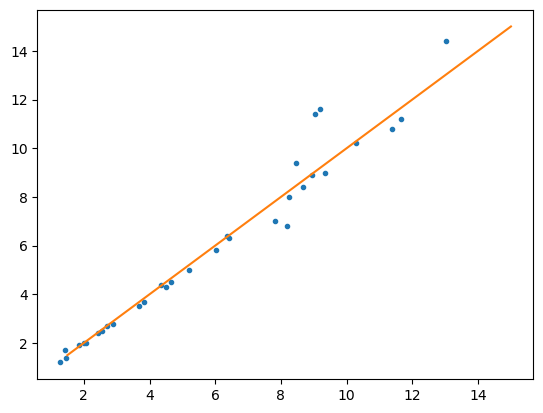

In [17]:

x0 = np.linspace(1.5,15)

plt.plot(B13_LCO10,B13_LpCO10,".")
plt.plot(x0,x0,"-")

In [18]:
#Combes 2011 include ULIRGs from z = 0.2 to 0.6 and mostly CO(1-0) and C(3-2) with some CO(2-1)
#most galaxies don't need a conversion factor here since they have CO(1-0) measurements

#G  Line    nu_obs  SCO     SCO_e   V     V_e   DV   DV_e  L'CO               S60   S100  logFIR  z
#           GHz     Jy km/s Jy km/s km/s  km/s  km/s km/s  10^10 K km/s pc^2  Jy    Jy    Lsun  

C11_ID,C11_V,C11_Ve,C11_LpCO = np.genfromtxt("Combes_2011",
                         usecols=(0,7,8,9),unpack=True,dtype=str)
C11_T,C11_ICO,C11_ICOe,C11_z = np.genfromtxt("Combes_2011",
                         usecols=(1,3,4,13),unpack=True,dtype=str)
C11_V = np.array(C11_V,dtype=float)
C11_Ve = np.array(C11_Ve,dtype=float)
C11_LpCO = np.array(C11_LpCO,dtype=float)

C11_ICO = np.array(C11_ICO,dtype=float)
C11_ICOe = np.array(C11_ICOe,dtype=float)
C11_z = np.array(C11_z,dtype=float)


C11_J = []

for i in range(len(C11_T)):
    J =  int(C11_T[i][1:2])
    C11_J.append(J)
    
C11_LCO10 = []
C11_LCO10_err = []
for i in range(len(C11_ID)):
    ICO = float(C11_ICO[i])
    ICOe = float(C11_ICOe[i])
    z = float(C11_z[i])
    J = int(C11_J[i])
    L,Lerr = LpCO(ICO,ICOe,z,J)/1e10
    L10,Lerr10 = toC10(L,Lerr,J)
    C11_LCO10.append(L10)
    C11_LCO10_err.append(Lerr10)
C11_LCO10 = np.asarray(C11_LCO10)
C11_LCO10_err = np.asarray(C11_LCO10_err)

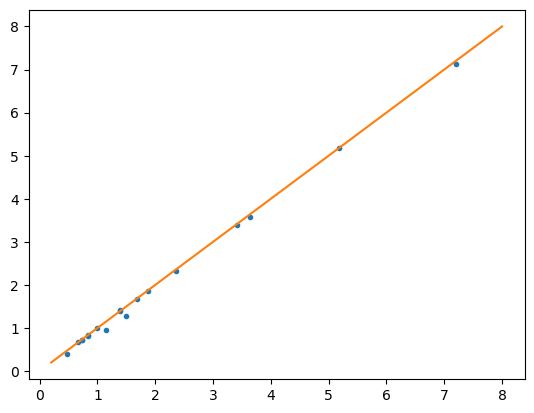

In [19]:

#plt.figure(figsize=(7,7))

x0 = np.linspace(0.2,8)

plt.plot(C11_LCO10,C11_LpCO,".")



plt.plot(x0,x0,"-")

In [20]:
#Combes 2013 include ULIRGs from z = 0.6 to 1.0 and CO(4-3) and CO(2-1) transitions this paper is
#completementary to Combes2011 which include z = 0.2 to 0.6 

#G  Line    nu_obs  SCO     SCO_e   V     V_e   DV   DV_e  L'CO               S60   S100  logFIR  z
#           GHz     Jy km/s Jy km/s km/s  km/s  km/s km/s  10^10 K km/s pc^2  Jy    Jy    Lsun  

C13_ID,C13_V,C13_Ve,C13_LpCO = np.genfromtxt("Combes_2013",
                         usecols=(0,7,8,9),unpack=True,dtype=str)
C13_T,C13_ICO,C13_ICOe,C13_z = np.genfromtxt("Combes_2013",
                         usecols=(1,3,4,13),unpack=True,dtype=str)
C13_V = np.array(C13_V,dtype=float)
C13_Ve = np.array(C13_Ve,dtype=float)
C13_LpCO = np.array(C13_LpCO,dtype=float)

C13_ICO = np.array(C13_ICO,dtype=float)
C13_ICOe = np.array(C13_ICOe,dtype=float)
C13_z = np.array(C13_z,dtype=float)


C13_J = []

for i in range(len(C13_T)):
    J =  int(C13_T[i][1:2])
    C13_J.append(J)
    
C13_LCO10 = []
C13_LCO10_err = []

C13_LCO = [] #non converted


for i in range(len(C13_ID)):
    ICO = float(C13_ICO[i])
    ICOe = float(C13_ICOe[i])
    z = float(C13_z[i])
    J = int(C13_J[i])
    L,Lerr = LpCO(ICO,ICOe,z,J)/1e10
    L10,Lerr10 = toC10(L,Lerr,J)
    C13_LCO10.append(L10)
    C13_LCO10_err.append(Lerr10)
    C13_LCO.append(L)
C13_LCO10 = np.asarray(C13_LCO10)
C13_LCO10_err = np.asarray(C13_LCO10_err)

C13_LCO = np.asarray(C13_LCO)

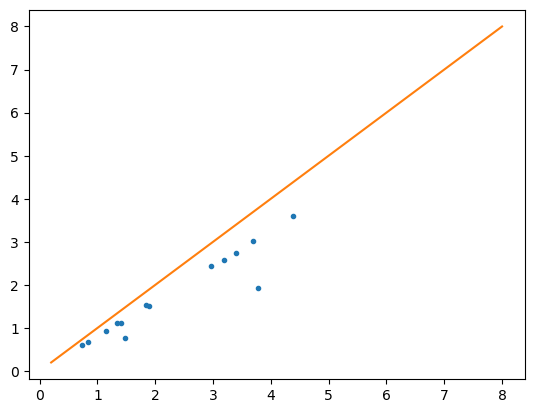

In [21]:

x0 = np.linspace(0.2,8)

plt.plot(C13_LCO10,C13_LpCO,".")
plt.plot(x0,x0,"-")

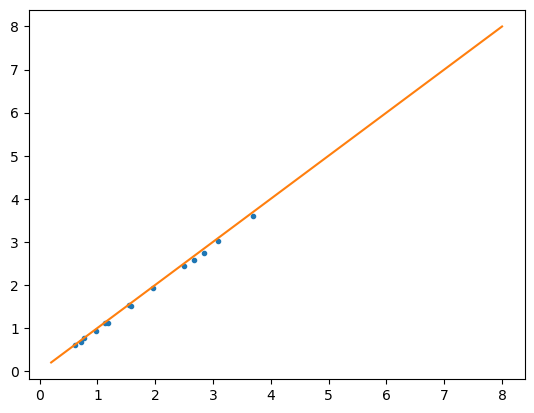

In [22]:
x0 = np.linspace(0.2,8)

plt.plot(C13_LCO,C13_LpCO,".")
plt.plot(x0,x0,"-")

In [23]:
#ID         T    z      V   Ve  ICO  ICOe LpCO  LpCOe nu

A16_ID,A16_V,A16_Ve,A16_LpCO,A16_LpCOe = np.genfromtxt("Aravena_2016",
                         usecols=(0,3,4,7,8),unpack=True,dtype=str)
A16_T,A16_ICO,A16_ICOe,A16_z = np.genfromtxt("Aravena_2016",
                         usecols=(1,5,6,2),unpack=True,dtype=str)

A16_V = np.array(A16_V,dtype=float)
A16_Ve = np.array(A16_Ve,dtype=float)

A16_LpCO = np.array(A16_LpCO,dtype=float)
A16_LpCOe = np.array(A16_LpCOe,dtype=float)

A16_ICO = np.array(A16_ICO,dtype=float)
A16_ICOe = np.array(A16_ICOe,dtype=float)
A16_z = np.array(A16_z,dtype=float)


A16_J = []

for i in range(len(A16_T)):
    J =  int(A16_T[i][1:2])
    A16_J.append(J)
    
A16_LCO10 = []
A16_LCO10_err = []
for i in range(len(A16_ID)):
    ICO = float(A16_ICO[i])
    ICOe = float(A16_ICOe[i])
    z = float(A16_z[i])
    J = int(A16_J[i])
    L,Lerr = LpCO(ICO,ICOe,z,J)/1e10
    L10,Lerr10 = toC10(L,Lerr,J)
    A16_LCO10.append(L10)
    A16_LCO10_err.append(Lerr10)
A16_LCO10 = np.asarray(A16_LCO10)
A16_LCO10_err = np.asarray(A16_LCO10_err)



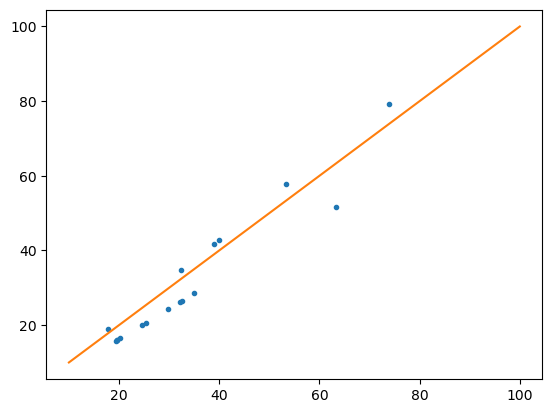

In [24]:
x0 = np.linspace(10,100)

plt.plot(0.9*A16_LCO10,A16_LpCO*10,".")
plt.plot(x0,x0,"-")

In [25]:
#ID z ze SCO SCOe V Ve ICO ICOe LpCO LpCOerr 
#0  1  2  3   4   5  6  7   8    9     10

H12_ID,H12_V,H12_Ve,H12_LpCO,H12_LpCOe = np.genfromtxt("Harris_2012",
                         usecols=(0,5,6,9,10),unpack=True,dtype=str)
H12_V = np.array(H12_V,dtype=float)
H12_Ve = np.array(H12_Ve,dtype=float)
H12_LpCO = np.array(H12_LpCO,dtype=float)
H12_LpCOe = np.array(H12_LpCOe,dtype=float)

In [52]:
#Source   IAU name         zco    <V> <Ve>   DL  DLe LIR  LIRe  mu muLpCO10 muLpCO10e muH2  muH2e 
#   0        1              2     3    4     5    6   7    8    9    10         11     12    13
#LpCO10 LpCO10 Mgas Mgase  T     V  Ve    I   Ie   muLp  muLpe
#  14      15   16   17    18   19  20    21  22   23     24

Y17_ID, Y17_V0, Y17_V0e, Y17_LpCO10, Y17_LpCO10e = np.genfromtxt("Yang_2017",
                               usecols=(0,3,4,10,11),unpack=True,dtype=str)
Y17_T, Y17_ICO, Y17_ICOe, Y17_z = np.genfromtxt("Yang_2017",usecols=(18,21,22,2),
                                                           unpack=True,dtype=str)
Y17_LCO,Y17_LCOe = np.genfromtxt("Yang_2017",usecols=(23,24),unpack=True,dtype=str)

Y17_mu, Y17_V,Y17_Ve = np.genfromtxt("Yang_2017",usecols=(9,19,20),unpack=True,dtype=str)

Y17_unLCO10, Y17_unLCO10e = np.genfromtxt("Yang_2017",usecols=(14,15),unpack=True,dtype=str)


Y17_unLCO10 = np.array(Y17_unLCO10,dtype = float)
Y17_unLCO10e = np.array(Y17_unLCO10e,dtype = float)

Y17_mu = np.array(Y17_mu,dtype=int)

Y17_V = np.array(Y17_V,dtype=float)
Y17_Ve = np.array(Y17_Ve,dtype=float)

Y17_V0 = np.array(Y17_V0,dtype=float)
Y17_V0e = np.array(Y17_V0e,dtype=float)

Y17_LpCO10 = np.array(Y17_LpCO10,dtype=float)
Y17_LpCO10e = np.array(Y17_LpCO10e,dtype=float)

Y17_LCO = np.array(Y17_LCO,dtype=float)
Y17_LCOe = np.array(Y17_LCOe,dtype=float)

Y17_ICO = np.array(Y17_ICO,dtype=float)
Y17_ICOe = np.array(Y17_ICOe,dtype=float)
Y17_z = np.array(Y17_z,dtype=float)




Y17_J = []

for i in range(len(Y17_T)):
    J =  int(Y17_T[i][1:2])
    Y17_J.append(J)
    
Y17_LCO10 = []
Y17_LCO10_err = []
for i in range(len(Y17_ID)):
    ICO = float(Y17_ICO[i])
    ICOe = float(Y17_ICOe[i])
    z = float(Y17_z[i])
    J = int(Y17_J[i])
    L,Lerr = LpCO(ICO,ICOe,z,J)/1e10
    L10,Lerr10 = toC10(L,Lerr,J)
    Y17_LCO10.append(L10)
    Y17_LCO10_err.append(Lerr10)
Y17_LCO10 = np.asarray(Y17_LCO10)
Y17_LCO10_err = np.asarray(Y17_LCO10_err)


In [73]:
#Name       z       T       ICO   ICOe  V    Ve  reference
ns_ID, ns_z, ns_T, ns_ICO, ns_ICOe, ns_V, ns_Ve =  np.genfromtxt("notable_sources",
                                  usecols=(0,1,2,3,4,5,6),unpack=True,dtype=str)

ns_z = np.asarray(ns_z,dtype=float)
ns_V = np.asarray(ns_V,dtype=float)
ns_Ve = np.asarray(ns_Ve,dtype=float)
ns_ICO = np.asarray(ns_ICO,dtype=float)
ns_ICOe = np.asarray(ns_ICOe,dtype=float)

ns_J = []

for i in range(len(ns_T)):
    J =  int(ns_T[i][1:2])
    ns_J.append(J)

ns_LCO10 = []
ns_LCO10_err = []
for i in range(len(ns_ID)):
    ICO = float(ns_ICO[i])
    ICOe = float(ns_ICOe[i])
    z = float(ns_z[i])
    J = int(ns_J[i])
    L,Lerr = LpCO(ICO,ICOe,z,J)/1e10
    L10,Lerr10 = toC10(L,Lerr,J)
    ns_LCO10.append(L10)
    ns_LCO10_err.append(Lerr10)
ns_LCO10 = np.asarray(ns_LCO10)
ns_LCO10_err = np.asarray(ns_LCO10_err)


In [ ]:
# 




Text(0.5, 0, "$L'_{CO(1-0)-calc}$")

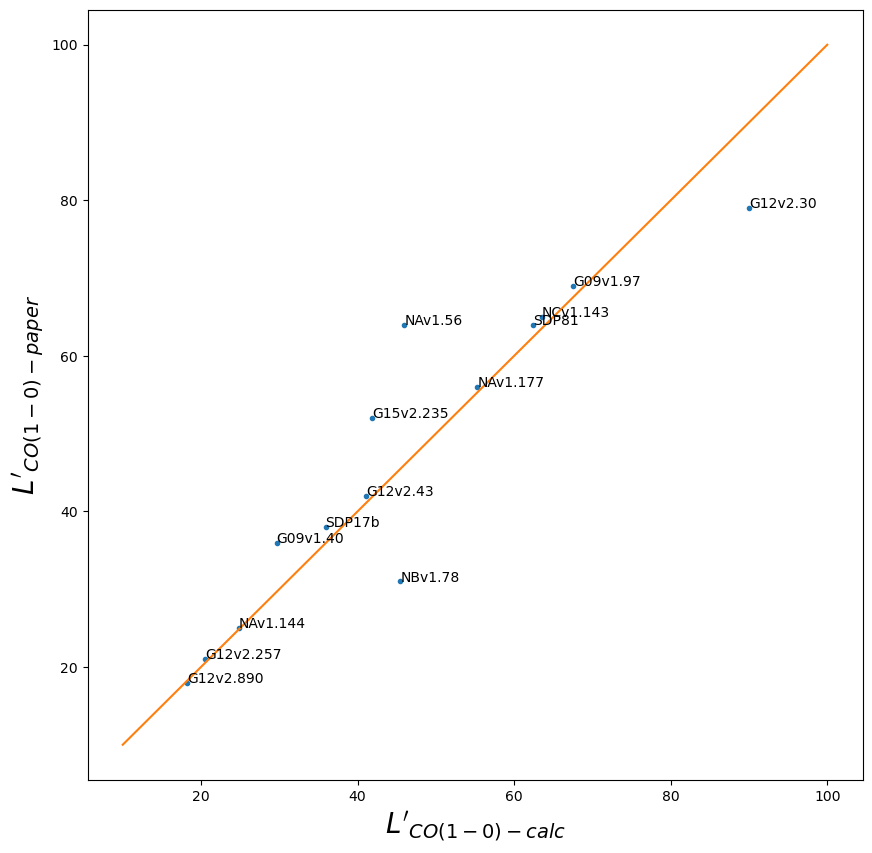

In [74]:
plt.figure(figsize=(10,10))

x0 = np.linspace(10,100)

plt.plot(Y17_LCO10,10*Y17_LpCO10,".")


for i in range(len(Y17_ID)):
    plt.annotate(Y17_ID[i],(Y17_LCO10[i],10*Y17_LpCO10[i]))
    #plt.annotate(Y17_ID[i],(Y17_LCO10[i]+0.5,10*Y17_LpCO10[i]+0.5))

plt.plot(x0,x0,"-")

plt.ylabel(r"$L'_{CO(1-0)-paper}$",fontsize=20)

plt.xlabel(r"$L'_{CO(1-0)-calc}$",fontsize=20)

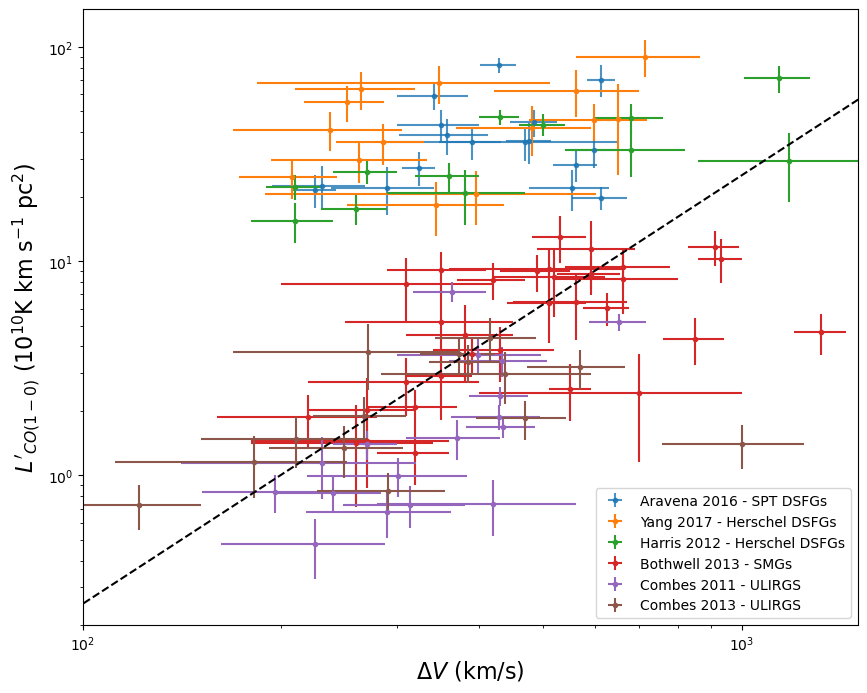

In [97]:

x0 = np.linspace(80,2000)
y0 = (10**5.4)*x0**2/1e10
plt.figure(figsize=(10,8))





#plt.errorbar(ns_V,ns_LCO10,xerr=ns_Ve,yerr=ns_LCO10_err,fmt="o",label="notable sources")
#for i in range(len(ns_ID)):
#    plt.annotate(ns_ID[i],(ns_V[i]*1.015,ns_LCO10[i]*1.1))
#    #plt.annotate(Y17_ID[i],(Y17_LCO10[i]+0.5,10*Y17_LpCO10[i]+0.5))

plt.errorbar(A16_V,A16_LCO10,xerr=A16_Ve,yerr=A16_LCO10_err,fmt=".",label="Aravena 2016 - SPT DSFGs",alpha=0.8)

#plt.errorbar(Y17_V0,10*Y17_LpCO10,xerr=Y17_V0e,yerr=10*Y17_LpCO10e,fmt=".",label="Yang 2017 - Lensed Herschel DSFGs")

#plt.errorbar(Y17_V0,Y17_LCO10,xerr=Y17_V0e,yerr=Y17_LCO10_err,fmt=".",label="Yang 2017 - Lensed Herschel DSFGs")

plt.errorbar(Y17_V0,Y17_LCO10,xerr=Y17_V0e,yerr=Y17_LCO10_err,fmt=".",label="Yang 2017 - Herschel DSFGs")


plt.errorbar(H12_V,H12_LpCO,xerr=H12_Ve,yerr=H12_LpCOe,fmt=".",label="Harris 2012 - Herschel DSFGs")
plt.errorbar(B13_V,B13_LCO10,xerr=B13_V_e,yerr=B13_LCO10_err,fmt=".",label="Bothwell 2013 - SMGs")
plt.errorbar(C11_V,C11_LCO10,xerr=C11_Ve,yerr=C11_LCO10_err,fmt=".",label="Combes 2011 - ULIRGS")
plt.errorbar(C13_V,C13_LCO10,xerr=C13_Ve,yerr=C13_LCO10_err,fmt=".",label="Combes 2013 - ULIRGS")


#plt.errorbar(A16_V,A16_LpCO*10,xerr=A16_Ve,yerr=A16_LpCOe*10,fmt=".",label="Aravena 2016")

plt.xscale("log")
plt.yscale("log")

plt.xlabel(r"$\Delta V$ (km/s)",fontsize=16)
plt.ylabel(r"$L'_{CO(1-0)}$ ($10^{10}$K km s$^{-1}$ pc$^2$)",fontsize=16)

plt.plot(x0,y0,"--",color="black")


#plt.plot(x0,10*y0,"--",color="cornflowerblue")
#plt.annotate(r"$\mu = 10$",(110,6),fontsize=16,color="cornflowerblue")


plt.ylim(0.2,150)

plt.xlim(100,1500)

plt.legend()

In [76]:
muCO_arr = []
muCOe_arr = []

mu880_arr = []
mu880e_arr = []

for i in range(len(Y17_mu)):
    if Y17_mu[i] == 1:
        mu0CO,mu0CO_err = muCO(Y17_V0[i],Y17_V0e[i],10*Y17_LpCO10[i],10*Y17_LpCO10e[i])
        muCO_arr.append(mu0CO)
        muCOe_arr.append(mu0CO_err)
        
        mu0880,mu0880_err = mu880(10*Y17_LpCO10[i], 10*Y17_LpCO10e[i],Y17_unLCO10[i], Y17_unLCO10e[i])
        mu880_arr.append(mu0880)
        mu880e_arr.append(mu0880_err)

In [77]:
muCO_arr = []
muCOe_arr = []

mu880_arr = []
mu880e_arr = []

for i in range(len(Y17_mu)):
    if Y17_mu[i] == 1:
        mu0CO,mu0CO_err = muCO(Y17_V[i],Y17_Ve[i],Y17_LCO10[i],Y17_LCO10_err[i])
        muCO_arr.append(mu0CO)
        muCOe_arr.append(mu0CO_err)
        
        mu0880,mu0880_err = mu880(10*Y17_LpCO10[i], 10*Y17_LpCO10e[i],Y17_unLCO10[i], Y17_unLCO10e[i])
        mu880_arr.append(mu0880)
        mu880e_arr.append(mu0880_err)

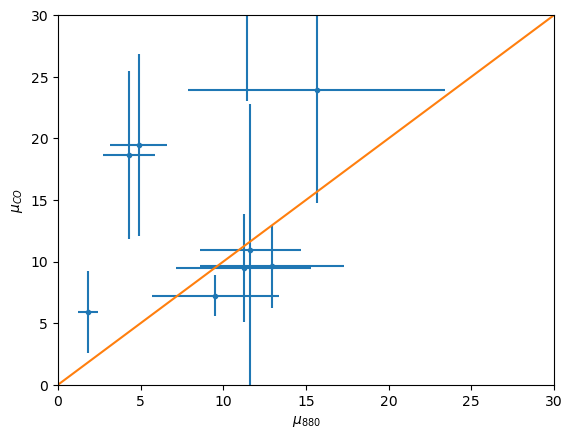

In [78]:


plt.errorbar(mu880_arr,muCO_arr,xerr=mu880e_arr,yerr=muCOe_arr,fmt=".")

plt.ylim(0,30)

plt.xlim(0,30)

x0 = np.linspace(0,50)

plt.xlabel(r"$\mu_{880}$")
plt.ylabel(r"$\mu_{CO}$")

plt.plot(x0,x0)

In [79]:
mu880_arr

[6.9,
 15.65217391304348,
 4.871794871794872,
 11.228070175438596,
 9.518072289156626,
 11.403508771929824,
 12.916666666666668,
 4.310344827586207,
 11.636363636363637,
 1.8055555555555556]

In [33]:
muCO_arr

[47.89560975009207,
 23.948462825087844,
 19.46204928925771,
 9.447897675022714,
 7.232091437477827,
 34.675675468883846,
 9.60474727048867,
 18.65647725729556,
 10.935152419827608,
 5.912915381506188]